## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
sns.set_theme(style='darkgrid')

### Importing our Titanic_dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### EDA Preprocessing

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
df_train.Sex.min()

'female'

In [7]:
df_train.Sex.max()

'male'

In [8]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Sex and Survived columns correlation

In [9]:
pd.crosstab(df_train['Sex'], df_train['Survived'])

Survived    0    1
Sex               
female     81  233
male      468  109

In [10]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_train.columns.value_counts().sum()

12

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_train['Survived'].mean()

0.3838383838383838

In [15]:
len(df_train)

891

In [16]:
df_train.iloc[:5]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [17]:
## Let's remove Survived column and fit to the end of the table
survived = df_train.pop('Survived')

In [18]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [19]:
df_train.columns.value_counts().sum()

11

In [20]:
col_name = 'Survived'

In [21]:
## Let's fit the column to the end of the table

df_train.insert(11, col_name ,survived)

In [22]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [23]:
df_train.iloc[:3,2:]

Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  Survived  
0      0         A/5 21171   7.2500   NaN        S         0  
1      0          PC 17599  71.2833   C85        C         1  
2      0  STON/O2. 3101282   7.9250   NaN        S         1

In [24]:
df_train[df_train.Survived == 1].head()

PassengerId  Pclass                                               Name  \
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
8  female  27.0      0      2            347742  11.1333   NaN        S   
9  female  14.0      1      0            237736  30.0708   NaN        C   

   Survived  
1         1  
2         1  
3         1  
8         1  
9         1

In [25]:
df_age = np.where((df_train.Age <= 20), df_train.Survived == 1,0)

In [26]:
df_train['age'] = np.where((df_train.Age <=20) & (df_train.Survived == 1), 'yes','no')

In [27]:
df_train[(df_train.Age <= 20) & (df_train.Survived == 1) & (df_train.Sex == 'male')].head()

PassengerId  Pclass                                             Name  \
78            79       2                    Caldwell, Master. Alden Gates   
125          126       3                     Nicola-Yarred, Master. Elias   
165          166       3  Goldsmith, Master. Frank John William "Frankie"   
183          184       2                        Becker, Master. Richard F   
193          194       2                       Navratil, Master. Michel M   

      Sex    Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Survived  age  
78   male   0.83      0      2  248738  29.0000   NaN        S         1  yes  
125  male  12.00      1      0    2651  11.2417   NaN        C         1  yes  
165  male   9.00      0      2  363291  20.5250   NaN        S         1  yes  
183  male   1.00      2      1  230136  39.0000    F4        S         1  yes  
193  male   3.00      1      1  230080  26.0000    F2        S         1  yes

In [28]:
df_train['new'] = np.where((df_train.Sex == 'male') & (df_train.Age <= 20) & (df_train.Survived == 1), 'yes', 'no')

In [29]:
df_train[df_train.new == 'yes'].head()

PassengerId  Pclass                                             Name  \
78            79       2                    Caldwell, Master. Alden Gates   
125          126       3                     Nicola-Yarred, Master. Elias   
165          166       3  Goldsmith, Master. Frank John William "Frankie"   
183          184       2                        Becker, Master. Richard F   
193          194       2                       Navratil, Master. Michel M   

      Sex    Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Survived  age  \
78   male   0.83      0      2  248738  29.0000   NaN        S         1  yes   
125  male  12.00      1      0    2651  11.2417   NaN        C         1  yes   
165  male   9.00      0      2  363291  20.5250   NaN        S         1  yes   
183  male   1.00      2      1  230136  39.0000    F4        S         1  yes   
193  male   3.00      1      1  230080  26.0000    F2        S         1  yes   

     new  
78   yes  
125  yes  
165  yes  
183  yes  
193  yes

In [30]:
np.where(df_train.age == 'yes')

(array([  9,  10,  22,  39,  43,  44,  58,  68,  78,  84, 125, 136, 156,
        165, 172, 183, 184, 192, 193, 204, 208, 220, 226, 233, 237, 261,
        283, 291, 305, 307, 311, 329, 340, 348, 381, 389, 407, 417, 427,
        435, 445, 446, 448, 469, 479, 489, 504, 530, 535, 546, 549, 550,
        585, 618, 622, 644, 651, 664, 677, 689, 691, 700, 720, 750, 751,
        755, 762, 777, 780, 781, 786, 788, 802, 803, 827, 830, 831, 853,
        855, 869, 875, 887], dtype=int64),)

In [31]:
df_train[(df_train.age == 'yes') & (df_train.new == 'yes')].head()

PassengerId  Pclass                                             Name  \
78            79       2                    Caldwell, Master. Alden Gates   
125          126       3                     Nicola-Yarred, Master. Elias   
165          166       3  Goldsmith, Master. Frank John William "Frankie"   
183          184       2                        Becker, Master. Richard F   
193          194       2                       Navratil, Master. Michel M   

      Sex    Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Survived  age  \
78   male   0.83      0      2  248738  29.0000   NaN        S         1  yes   
125  male  12.00      1      0    2651  11.2417   NaN        C         1  yes   
165  male   9.00      0      2  363291  20.5250   NaN        S         1  yes   
183  male   1.00      2      1  230136  39.0000    F4        S         1  yes   
193  male   3.00      1      1  230080  26.0000    F2        S         1  yes   

     new  
78   yes  
125  yes  
165  yes  
183  yes  
193  yes

In [32]:
df_train['new'] = np.where((df_train.Age <= 18), 'adult', 
                           np.where((df_train.Age <=5 ), 'baby', 'agad'))

where function use for filtering...
np.where(condition, 'value one', if false 'value two')
np.where(condition_one 'operator' condition_two 'operrator' condition_three, 'value one', 'value two')

> np.where(df.age >= 18, 'adult', 'teenage')

> np.where((df.age >= 18 ) & (df.age <=30), 'adult', np.where(df.age <= 5), 'baby', 'aged')

In [33]:
df_train[['Age', 'Survived']].groupby(df_train['Sex']).median()

Age  Survived
Sex                   
female  27.0         1
male    29.0         0

In [34]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).median().sort_values(by='Survived')

Sex  Survived
1    male         0
0  female         1

In [35]:
df_train[['Pclass', 'Survived']].groupby(df_train['Sex']).median()

Pclass  Survived
Sex                     
female       2         1
male         3         0

In [36]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived age   new  
0         0  no  agad  
1         1  no  agad  
2         1  no  agad  
3         1  no  agad  
4         0  no  agad

## Data Visualization with matplotlib and Seaborn

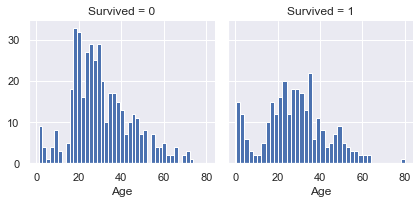

In [37]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=40);

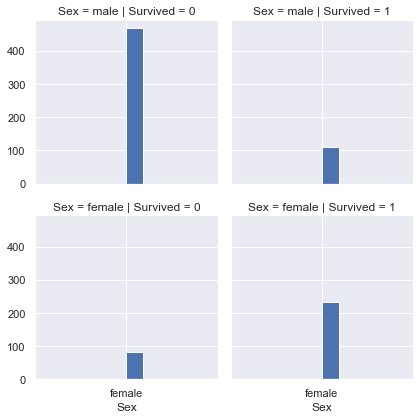

In [38]:
g = sns.FacetGrid(df_train, col='Survived', row='Sex')
g.map(plt.hist, 'Sex', bins=10);

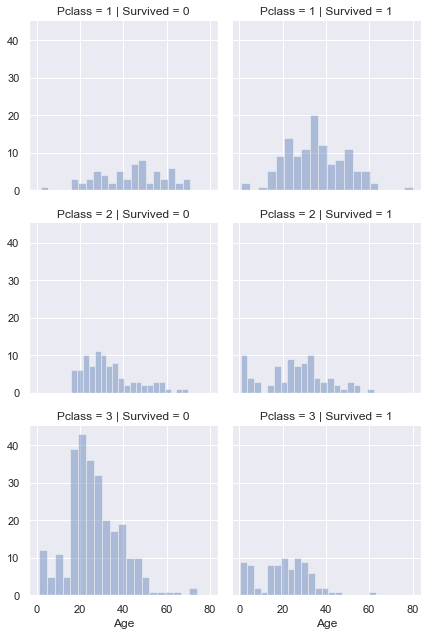

In [39]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20, alpha = .4)
grid.add_legend();

## EDA(exploratory Data Analysis) with Pandas-Profiling

In [40]:
profile = ProfileReport(df_train, title='titanic Profiling Report')

In [41]:
#profile

C:\Users\Sorcim\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sorcim\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Sorcim\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


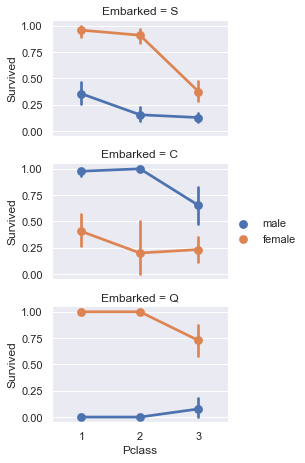

In [42]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

In [43]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived age   new  
0         0  no  agad  
1         1  no  agad  
2         1  no  agad  
3         1  no  agad  
4         0  no  agad

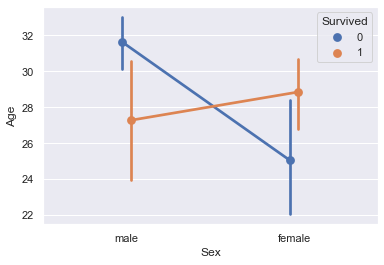

In [44]:
sns.pointplot(x='Sex', y='Age', hue='Survived', data=df_train, dodge=True);

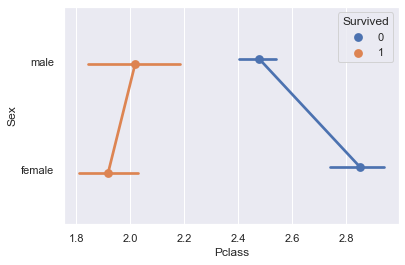

In [45]:
sns.pointplot(x='Pclass', y='Sex', hue='Survived', data=df_train, dodge=True);

In [46]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived age   new  
0         0  no  agad  
1         1  no  agad  
2         1  no  agad  
3         1  no  agad  
4         0  no  agad

<AxesSubplot:xlabel='Survived', ylabel='Age'>

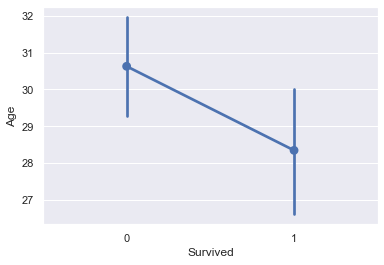

In [47]:
sns.pointplot(x='Survived', y='Age', data=df_train)

In [48]:
sns.set_theme(style='ticks')

<AxesSubplot:xlabel='Sex', ylabel='count'>

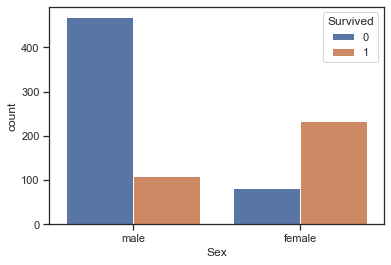

In [49]:
sns.countplot(x='Sex', hue='Survived', data=df_train)

C:\Users\Sorcim\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


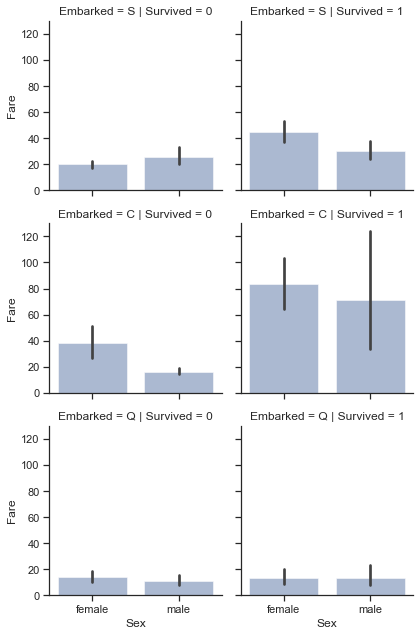

In [50]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
plt.show();

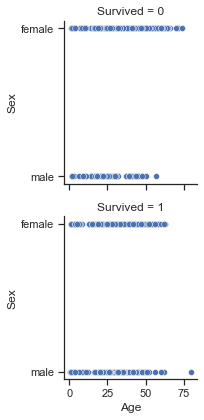

In [51]:
grid = sns.FacetGrid(df_train, row='Survived')
grid.map(sns.scatterplot, 'Age', 'Sex')

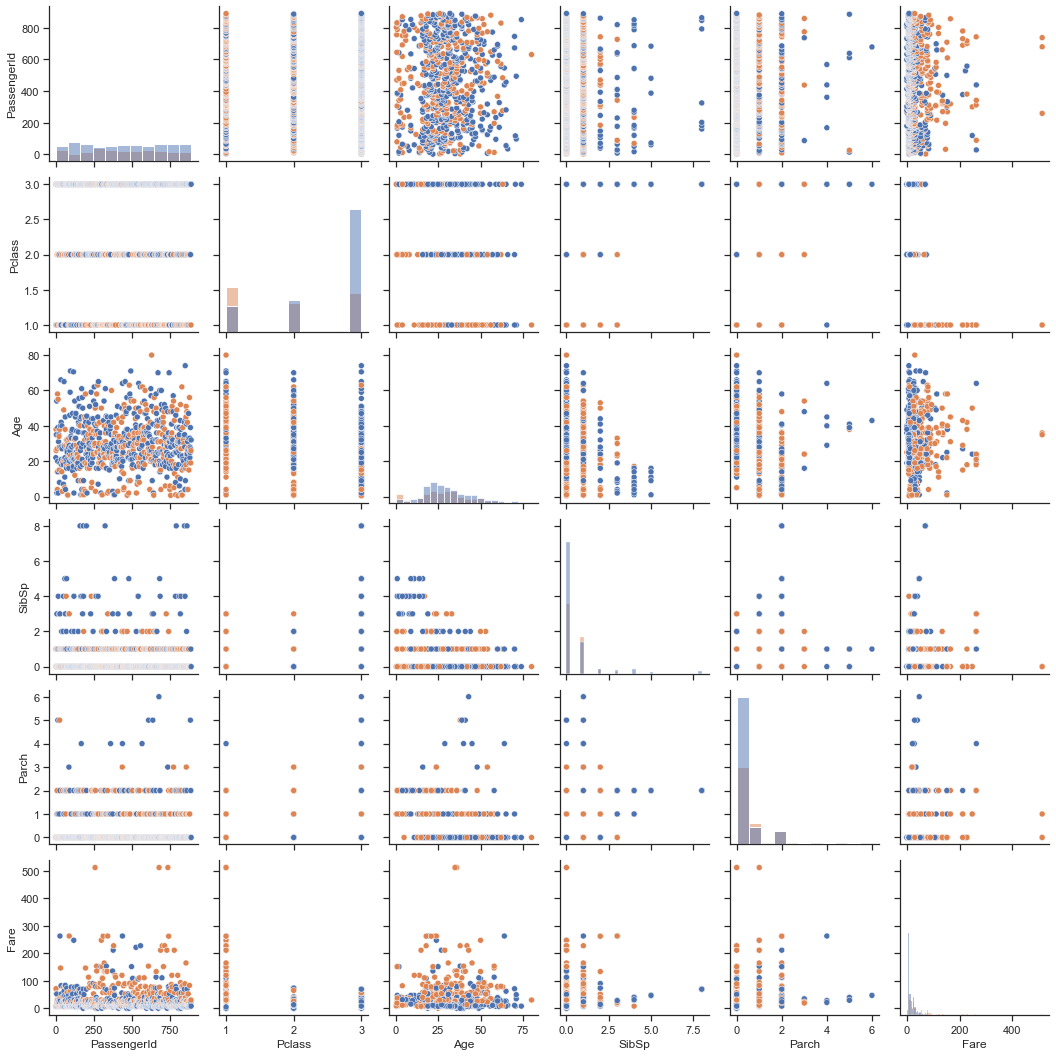

In [52]:
grid = sns.PairGrid(df_train, hue='Survived')
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)

NameError: name 'scatter' is not defined

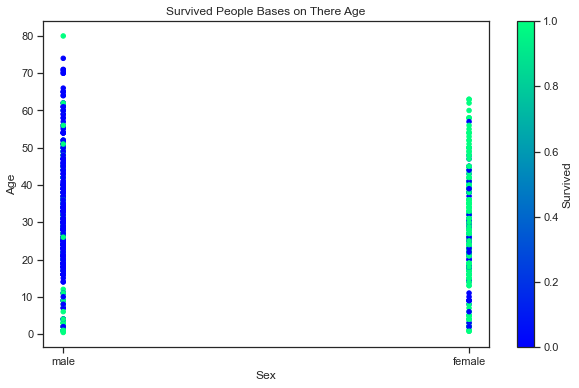

In [53]:

fig, ax = plt.subplots(figsize=(10,6))
df_train.plot(x='Sex', y='Age', kind='scatter', c='Survived', ax=ax, cmap='winter');
ax.set(xlabel='Sex', ylabel = 'Age', title='Survived People Bases on There Age')

ax.legend(*scatter.legend_elements(), title='Survived')

ax.axhline(df_train['Age'].median(), linestyle='--');


In [54]:
df_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
age              0
new              0
dtype: int64

In [55]:
df_train.shape

(891, 14)

In [56]:
df_train = df_train.drop('Cabin', axis=1)

In [57]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
4    male  35.0      0      0            373450   8.0500        S         0   

  age   new  
0  no  agad  
1  no  agad  
2  no  agad  
3  no  agad  
4  no  agad

In [58]:
df_train = df_train.dropna()

In [59]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
4    male  35.0      0      0            373450   8.0500        S         0   

  age   new  
0  no  agad  
1  no  agad  
2  no  agad  
3  no  agad  
4  no  agad

In [60]:
df_train.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
age            0
new            0
dtype: int64

In [61]:
df_train.Age.sum()

21105.17

In [62]:
df_train.mean()

PassengerId    448.589888
Pclass           2.240169
Age             29.642093
SibSp            0.514045
Parch            0.432584
Fare            34.567251
Survived         0.404494
dtype: float64

In [63]:
df_train.median()

PassengerId    445.00000
Pclass           2.00000
Age             28.00000
SibSp            0.00000
Parch            0.00000
Fare            15.64585
Survived         0.00000
dtype: float64

In [64]:
df_train.loc[:3]

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   

  age   new  
0  no  agad  
1  no  agad  
2  no  agad  
3  no  agad

In [65]:
df_train.iloc[:4,:2]

PassengerId  Pclass
0            1       3
1            2       1
2            3       3
3            4       1

In [66]:
df_train.iloc[6:10, 3:8]

Sex   Age  SibSp  Parch   Ticket
7     male   2.0      3      1   349909
8   female  27.0      0      2   347742
9   female  14.0      1      0   237736
10  female   4.0      1      1  PP 9549

In [67]:
df_train[df_train.Sex == 'female'].head(2)

PassengerId  Pclass                                               Name  \
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   

  age   new  
1  no  agad  
2  no  agad

In [68]:
df_train.Age[df_train.Age == 1].value_counts()

1.0    7
Name: Age, dtype: int64

In [69]:
df_train[(df_train.Age >= 1) & (df_train.Survived == 1)].head()

PassengerId  Pclass                                               Name  \
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
8  female  27.0      0      2            347742  11.1333        S         1   
9  female  14.0      1      0            237736  30.0708        C         1   

   age    new  
1   no   agad  
2   no   agad  
3   no   agad  
8   no   agad  
9  yes  adult

In [70]:
pd.crosstab(df_train.Survived, df_train.Age)

Age       0.42   0.67   0.75   0.83   0.92   1.00   2.00   3.00   4.00   \
Survived                                                                  
0             0      0      0      0      0      2      7      1      3   
1             1      1      2      2      1      5      3      5      7   

Age       5.00   ...  62.00  63.00  64.00  65.00  66.00  70.00  70.50  71.00  \
Survived         ...                                                           
0             0  ...      2      0      2      3      1      2      1      2   
1             4  ...      1      2      0      0      0      0      0      0   

Age       74.00  80.00  
Survived                
0             1      0  
1             0      1  

[2 rows x 88 columns]

In [71]:
df_train['Name'] = df_train.Name.str.lower()

In [72]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            braund, mr. owen harris   
1            2       1  cumings, mrs. john bradley (florence briggs th...   
2            3       3                             heikkinen, miss. laina   
3            4       1       futrelle, mrs. jacques heath (lily may peel)   
4            5       3                           allen, mr. william henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
4    male  35.0      0      0            373450   8.0500        S         0   

  age   new  
0  no  agad  
1  no  agad  
2  no  agad  
3  no  agad  
4  no  agad

In [73]:
df_train['Name'] = df_train.Name.str.upper()

In [74]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            BRAUND, MR. OWEN HARRIS   
1            2       1  CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...   
2            3       3                             HEIKKINEN, MISS. LAINA   
3            4       1       FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)   
4            5       3                           ALLEN, MR. WILLIAM HENRY   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
4    male  35.0      0      0            373450   8.0500        S         0   

  age   new  
0  no  agad  
1  no  agad  
2  no  agad  
3  no  agad  
4  no  agad

In [75]:
df_train.Name = df_train.Name.str.title()

In [76]:
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
4    male  35.0      0      0            373450   8.0500        S         0   

  age   new  
0  no  agad  
1  no  agad  
2  no  agad  
3  no  agad  
4  no  agad

In [77]:
df_train = pd.read_csv('train.csv')

In [78]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
df_train.Embarked.fillna('Missing', inplace=True)

In [80]:
df_train.Embarked.replace(['Missing'], 'Unknown', inplace=True)

In [81]:
df_train[df_train.Embarked == 'Unknown']

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28  Unknown  
829  female  62.0      0      0  113572  80.0   B28  Unknown

In [82]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [83]:
df_train.Age.mean()

29.69911764705882

In [84]:
df_train.Age.median()

28.0

In [85]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [86]:
df_train['Age Level'] = np.where((df_train.Age <=18), 'Teen Age', 
                                 np.where((df_train.Age <=8 ), 'Baby', 'aged'))

In [87]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Level  
0      0         A/5 21171   7.2500   NaN        S      aged  
1      0          PC 17599  71.2833   C85        C      aged  
2      0  STON/O2. 3101282   7.9250   NaN        S      aged  
3      0            113803  53.1000  C123        S      aged  
4      0            373450   8.0500   NaN        S      aged

In [88]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age Level       object
dtype: object

In [89]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age Level        0
dtype: int64

In [90]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Level  
0      0         A/5 21171   7.2500   NaN        S      aged  
1      0          PC 17599  71.2833   C85        C      aged  
2      0  STON/O2. 3101282   7.9250   NaN        S      aged  
3      0            113803  53.1000  C123        S      aged  
4      0            373450   8.0500   NaN        S      aged

In [91]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Level  
0      0         A/5 21171   7.2500   NaN        S      aged  
1      0          PC 17599  71.2833   C85        C      aged  
2      0  STON/O2. 3101282   7.9250   NaN        S      aged  
3      0            113803  53.1000  C123        S      aged  
4      0            373450   8.0500   NaN        S      aged

In [92]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age Level        0
dtype: int64

In [93]:
df_train['Age'] = df_train.Age.fillna(df_train.Age.median())

In [94]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Level  
0      0         A/5 21171   7.2500   NaN        S      aged  
1      0          PC 17599  71.2833   C85        C      aged  
2      0  STON/O2. 3101282   7.9250   NaN        S      aged  
3      0            113803  53.1000  C123        S      aged  
4      0            373450   8.0500   NaN        S      aged

In [95]:
df_train['Cabin'] = df_train.Cabin.fillna(method='bfill')

In [96]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Level  
0      0         A/5 21171   7.2500   C85        S      aged  
1      0          PC 17599  71.2833   C85        C      aged  
2      0  STON/O2. 3101282   7.9250  C123        S      aged  
3      0            113803  53.1000  C123        S      aged  
4      0            373450   8.0500   E46        S      aged

In [97]:
df_train['Cabin'] = df_train['Cabin'].fillna(method='ffill')

In [98]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age Level      0
dtype: int64

In [99]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age Level       object
dtype: object

In [100]:
df_model = df_train.copy()

In [101]:
df_model.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Level  
0      0         A/5 21171   7.2500   C85        S      aged  
1      0          PC 17599  71.2833   C85        C      aged  
2      0  STON/O2. 3101282   7.9250  C123        S      aged  
3      0            113803  53.1000  C123        S      aged  
4      0            373450   8.0500   E46        S      aged

In [102]:
df_train.describe(include=['object'])

Name   Sex    Ticket Cabin Embarked Age Level
count                 891   891       891   891      891       891
unique                891     2       681   147        4         2
top     Boulos, Mr. Hanna  male  CA. 2343   C78        S      aged
freq                    1   577         7    33      644       752

In [103]:
df_train.rename(columns={'Age Level': 'Age stages'}, inplace=True)

In [104]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age stages  
0      0         A/5 21171   7.2500   C85        S       aged  
1      0          PC 17599  71.2833   C85        C       aged  
2      0  STON/O2. 3101282   7.9250  C123        S       aged  
3      0            113803  53.1000  C123        S       aged  
4      0            373450   8.0500   E46        S       aged

In [105]:
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked
Age stages


In [106]:
df_train.Age.dtype

dtype('float64')

In [107]:
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype('category').cat.as_ordered()

In [108]:
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
Age stages     category
dtype: object

In [109]:
for label, content in df_train.items():
    if pd.api.types.is_categorical_dtype(content):
        df_train[label] = content.cat.codes + 1

In [110]:
df_train.head()

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   109    2  22.0      1      0     524   
1            2         1       1   191    1  38.0      1      0     597   
2            3         1       3   354    1  26.0      0      0     670   
3            4         1       1   273    1  35.0      1      0      50   
4            5         0       3    16    2  35.0      0      0     473   

      Fare  Cabin  Embarked  Age stages  
0   7.2500     82         3           2  
1  71.2833     82         1           2  
2   7.9250     56         3           2  
3  53.1000     56         3           2  
4   8.0500    130         3           2

In [111]:
x = df_train[df_train['Age'] < 1]

In [112]:
df_train['Age'] = df_train['Age'].replace([x], 'NaN')

In [113]:
df_train[df_train.Age == 'NaN']

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
1              2         1       1   191    1  NaN      1      0     597   
6              7         0       1   516    2  NaN      0      0      86   
7              8         0       3   625    2  NaN      3      1     396   
15            16         1       2   360    1  NaN      0      0     154   
16            17         0       3   683    2  NaN      4      1     481   
..           ...       ...     ...   ...  ...  ...    ...    ...     ...   
824          825         0       3   631    2  NaN      4      1     250   
827          828         1       2   504    2  NaN      0      2     619   
831          832         1       2   687    2  NaN      1      1     238   
844          845         0       3   190    2  NaN      0      0     265   
860          861         0       3   326    2  NaN      2      0     400   

        Fare  Cabin  Embarked  Age stages  
1    71.2833     82         1           2  
6    51.8625    130         3           2  
7    21.0750    146         3           1  
15   16.0000    112         3           2  
16   29.1250    112         2           1  
..       ...    ...       ...         ...  
824  39.6875     22         3           1  
827  37.0042     22         1           1  
831  18.7500    131         3           1  
844   8.6625     87         3           1  
860  14.1083     95         3           2  

[96 rows x 13 columns]

In [114]:
df_train 

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
0              1         0       3   109    2   22      1      0     524   
1              2         1       1   191    1  NaN      1      0     597   
2              3         1       3   354    1   26      0      0     670   
3              4         1       1   273    1   35      1      0      50   
4              5         0       3    16    2   35      0      0     473   
..           ...       ...     ...   ...  ...  ...    ...    ...     ...   
886          887         0       2   549    2   27      0      0     102   
887          888         1       1   304    1   19      0      0      15   
888          889         0       3   414    1   28      1      2     676   
889          890         1       1    82    2   26      0      0       9   
890          891         0       3   221    2   32      0      0     467   

        Fare  Cabin  Embarked  Age stages  
0     7.2500     82         3           2  
1    71.2833     82         1           2  
2     7.9250     56         3           2  
3    53.1000     56         3           2  
4     8.0500    130         3           2  
..       ...    ...       ...         ...  
886  13.0000     31         3           2  
887  30.0000     31         3           2  
888  23.4500     61         3           2  
889  30.0000     61         1           2  
890   7.7500     61         2           2  

[891 rows x 13 columns]

## Modeling our data with Sklearn

importing important models for classification from sklearn library

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


importing important libraries from sklearn for feature-engineering

In [116]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**Split the Data with the help of train_test_split**

In [117]:
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

In [118]:
for label, content in df_model.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked
Age Level


In [119]:
for label, content in df_model.items():
    if pd.api.types.is_string_dtype(content):
        df_model[label] = content.astype(str)

        
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age Level    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Feature Engineering

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
conde = df_model[df_model.columns[:]].apply(le.fit_transform)

In [121]:
conde

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
0              0         0       2   108    1   28      1      0     523   
1              1         1       0   190    0   51      1      0     596   
2              2         1       2   353    0   34      0      0     669   
3              3         1       0   272    0   47      1      0      49   
4              4         0       2    15    1   47      0      0     472   
..           ...       ...     ...   ...  ...  ...    ...    ...     ...   
886          886         0       1   548    1   35      0      0     101   
887          887         1       0   303    0   24      0      0      14   
888          888         0       2   413    0   36      1      2     675   
889          889         1       0    81    1   34      0      0       8   
890          890         0       2   220    1   42      0      0     466   

     Fare  Cabin  Embarked  Age Level  
0      18     81         2          1  
1     207     81         0          1  
2      41     55         2          1  
3     189     55         2          1  
4      43    129         2          1  
..    ...    ...       ...        ...  
886    85     30         2          1  
887   153     30         2          1  
888   131     60         2          1  
889   153     60         0          1  
890    30     60         1          1  

[891 rows x 13 columns]

## Feature engineering with Pandas categorical to numeic

In [122]:
XX = X.copy()

In [123]:
for label, content in XX.items():
    if pd.api.types.is_string_dtype(content):
        XX[label] = content.astype('category').cat.as_ordered()

In [124]:
for label, content in XX.items():
    if pd.api.types.is_categorical_dtype(content):
        XX[label] = content.cat.codes+1

In [125]:
XX.head()

PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0            1       3   109    2  22.0      1      0     524   7.2500     82   
1            2       1   191    1  38.0      1      0     597  71.2833     82   
2            3       3   354    1  26.0      0      0     670   7.9250     56   
3            4       1   273    1  35.0      1      0      50  53.1000     56   
4            5       3    16    2  35.0      0      0     473   8.0500    130   

   Embarked  Age Level  
0         3          2  
1         1          2  
2         3          2  
3         3          2  
4         3          2

In [126]:
X.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   C85        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250  C123        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   E46        S   

  Age Level  
0      aged  
1      aged  
2      aged  
3      aged  
4      aged

split the test and train data and fit into train_test_split()

In [127]:
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.2)

## let's fit different models
1. LogisticRegression()

In [128]:
model = LogisticRegression()
model.fit(XX_train, y_train)

C:\Users\Sorcim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
model.score(XX_test, y_test)

0.7318435754189944

2. RandomForestClassifier()

In [130]:
model = RandomForestClassifier()
model.fit(XX_train, y_train)

RandomForestClassifier()

In [131]:
model.score(XX_test, y_test)

0.8212290502793296

3. KneighboresClassifier

In [132]:
model = KNeighborsClassifier()
model.fit(XX_train, y_train)

KNeighborsClassifier()

In [133]:
model.score(XX_test, y_test)

0.5754189944134078

4. DecisionTreeClassifier()

In [134]:
model = DecisionTreeClassifier()
model.fit(XX_train, y_train)

DecisionTreeClassifier()

In [135]:
model.score(XX_test, y_test)

0.7150837988826816

5. GradientBoostingClassifier

In [136]:
model = GradientBoostingClassifier()
model.fit(XX_train, y_train)
model.score(XX_test, y_test)

0.7653631284916201

#### will pick GradientBoostingClassifier()

### Let's predict on our data
* predict()
* predict_proba()

In [137]:
model.predict(XX_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [138]:
y_preds = model.predict(XX_test)
np.mean(y_preds == y_test)

0.7653631284916201

In [139]:
model.score(XX_test, y_test)

0.7653631284916201

In [140]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.7653631284916201

In [141]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, XX, y)

array([0.62011173, 0.78089888, 0.86516854, 0.79213483, 0.83707865])

In [142]:
cross_val_score(model, XX, y, cv=5)

array([0.61452514, 0.78089888, 0.85955056, 0.79213483, 0.83707865])

In [143]:
np.random.seed()

model_single_score = model.score(XX_test, y_test)

model_cross_val_mean = np.mean(cross_val_score(model, XX, y, cv=10))

model_single_score, model_cross_val_mean

(0.7653631284916201, 0.8137078651685392)

In [144]:
model_cross_val_mean = np.mean(cross_val_score(model, XX, y, cv=10, scoring=None))
model_cross_val_mean

0.8148314606741571

classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Metrix
4. Classification Report

In [145]:
print(f'Survived people in titanic score on titanic dataset: {model_cross_val_mean * 100: .2f}%')

Survived people in titanic score on titanic dataset:  81.48%


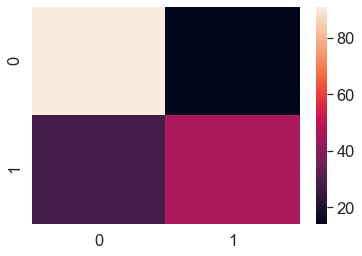

In [146]:
sns.set(font_scale = 1.5)

con_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(con_mat);

In [147]:
con_mat

array([[91, 14],
       [28, 46]], dtype=int64)

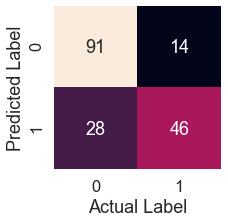

In [148]:
def plot_con_mat(con_mat):
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(con_mat, annot=True, cbar=False)
    
    plt.xlabel('Actual Label')
    plt.ylabel('Predicted Label')
    
    
plot_con_mat(con_mat)

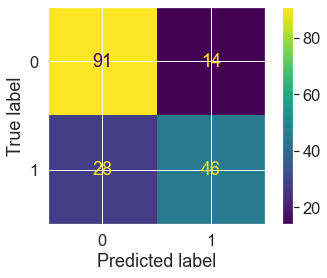

In [149]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, XX_test, y_test)

In [150]:

from sklearn.metrics import classification_report
class_rep = classification_report(y_test, y_preds)

print(class_rep)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       105
           1       0.77      0.62      0.69        74

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



In [154]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [207]:
reg = Ridge(normalize=True)
lasso = Lasso(alpha=0.4, normalize=True)

In [208]:
Xn = XX
yn = y

In [209]:
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

In [210]:
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.30517846377063973

In [211]:
reg.score(X_test, y_test)

0.3464956756183333

### Cross Validation


In [221]:
cross_val = cross_val_score(reg, XX, y, cv=10)

In [222]:
cross_val = cross_val.mean()
cross_val

0.2851565151448211

In [218]:
lasso.fit(X_train, y_train).coef_
lasso.score(X_train, y_train)

0.0